## CS 889 Assignment 02
### Yuwei Jiao 20645480

### Objective 1
### description:
- problem:
    1. tried to use provided helper function to display greyscale images but get really weird colorful output.
    2. wanted to use bitwise operation in opencv but got type errors.
- resources: 
    1. use this [link][1] to handle grayscale image display.
[1]: (http://opencv-python-tutroals.readthedocs.io/en/stable/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html)

In [1]:
%matplotlib inline
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from helpers import imshow

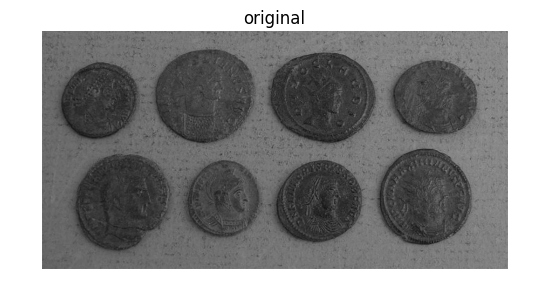

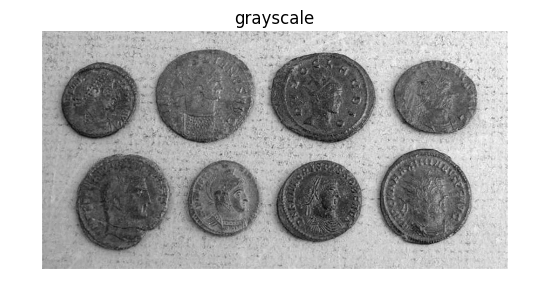

In [2]:
# load original image
oriimg = cv2.imread('coins-bw.jpg')
row, col, channel = oriimg.shape
imshow(oriimg, 'original')
# convert to grayscale
img = cv2.cvtColor(oriimg, cv2.COLOR_BGR2GRAY)
imshow(img, 'grayscale')

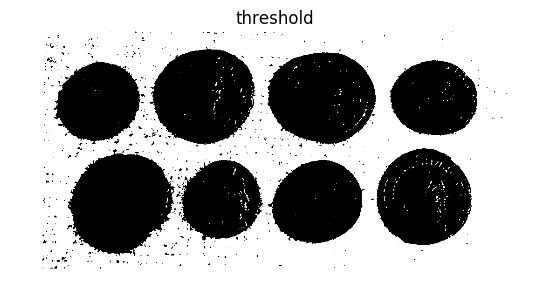

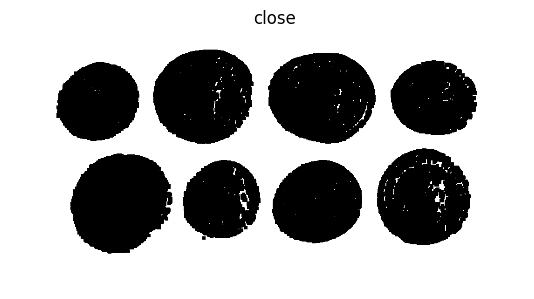

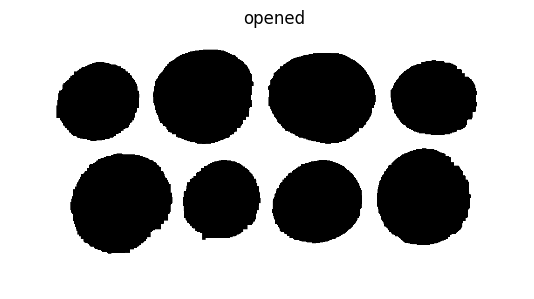

In [3]:
# threshold
ret, th1 = cv2.threshold(img, 95, 255, cv2.THRESH_BINARY)
imshow(th1, 'threshold')
# morphological operations
kernel = np.ones((3,3),np.uint8)
processed = cv2.morphologyEx(th1, cv2.MORPH_CLOSE, kernel, iterations = 3)
imshow(processed, 'close')
processed = cv2.morphologyEx(processed, cv2.MORPH_OPEN, kernel, iterations = 5)
imshow(processed, 'opened')

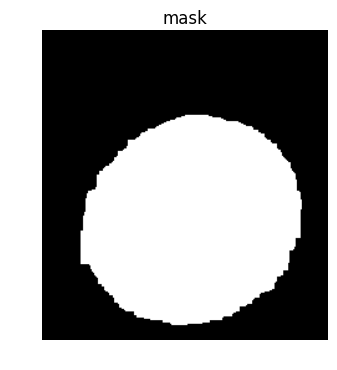

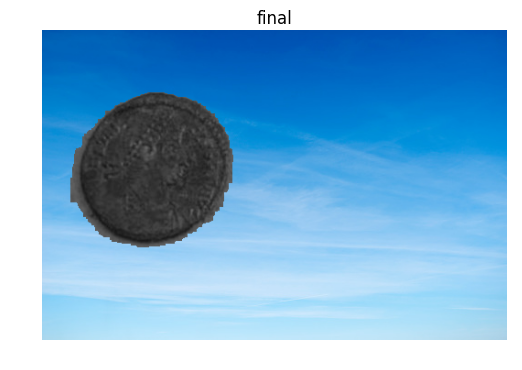

In [8]:
# load background image
bg = cv2.imread('bg.jpg')
pic = bg
# create mask
mask = cv2.bitwise_not(processed[0:250, 0:230])
imshow(mask, 'mask')
# composite
for i in range(250):
    for j in range(230):
        if mask[i, j]:
            pic[i, j, :] = oriimg[i, j, :]
imshow(pic, 'final')

### Objective 2
### description:
- problem:
    1. drawing error when manipulate image with numpy: Layout of the output array img is incompatible with cv::Mat (step\[ndims-1\] != elemsize or step\[1\] != elemsize*nchannels)
    2. hard to extract face precisely, and threshold value varies under different circumstances. 
- resources: 
    1. use this [link][1] to solve problem 1 with creating a new image
    
[1]: http://stackoverflow.com/questions/30249053/python-opencv-drawing-errors-after-manipulating-array-with-numpy

In [1]:
%matplotlib inline
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from helpers import imshow

In [9]:
camera = cv2.VideoCapture(0)
# position for my rectangle
x1 = 200
y1 = 100
x2 = 300
y2 = 600
# parameters for blur
bsize = 1
bmax = 30
tot = (x2 - x1) * (y2 - y1)
while True:
    ret, frame = camera.read()
    # mirror symmetry
    frame = np.fliplr(frame)
    frame = frame.copy()
    # extract people
    row, col, channel = frame.shape
    bg = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # parameter varies here
    # threshold
    ret, bg = cv2.threshold(bg, 180, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((3,3),np.uint8)
    bg = cv2.morphologyEx(bg, cv2.MORPH_OPEN, kernel, iterations = 4)
    bg = cv2.morphologyEx(bg, cv2.MORPH_CLOSE, kernel, iterations = 4)
    bg = bg / 255
    
    # calculate blur size
    rec = bg[x1:x2, y1:y2]
    cnt = np.count_nonzero(rec)
    bsize = max(int(np.rint(bmax * cnt / tot)), 1)
    
    # generate new image with mask
    for i in range(channel):
        frame[:, :, i] = np.multiply(frame[:, :, i], bg)
    cv2.rectangle(frame, (x1, y1), (x2, y2), (255,0,0), 2)
    dst = cv2.blur(frame,(bsize, bsize))
    cv2.imshow('camera', dst)
    if cv2.waitKey(5) == 27: #esc
        break
cv2.destroyAllWindows()
camera.release()

### Result:
![alt text][0]
![alt text][1]
![alt text][2]
[0]: 0.jpg
[1]: 1.jpg
[2]: 2.jpg